In [67]:
import sys
import os
from mpi4py import MPI
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'

import floatpy.readers.padeops_reader as por
import floatpy.readers.parallel_reader as pdr
import floatpy.utilities.reduction as red
import floatpy.derivatives.compact.compact_derivative as cd
import statistics as stats

directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc07/256x192x128/vizdump'
filename_prefix = directory+'/shearlayer_'

reader = por.PadeopsReader(filename_prefix, periodic_dimensions=(False,False,True))
x, y, z = reader.readCoordinates()


(192, 6)


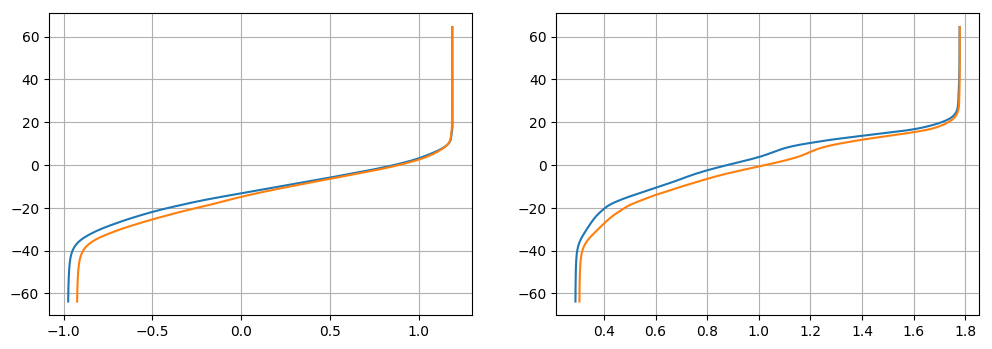

In [81]:
# Thicknesses

fname = filename_prefix+'means.dat'
dat = np.fromfile(fname,dtype=float, count=-1, sep=' ')
n = np.size(dat)

nq = 6
nstats = nq*2+1
dat = np.reshape(dat,[n/nstats,nstats])
q_bar = dat[:,0:nq]
q_tilde = dat[:,nq+1:]

print(np.shape(q_bar))

# Plotting
yplot = y[1,:,1]
fig, axarr = plt.subplots(1,2, figsize=(12,4), dpi=100) 
axarr[0].plot(q_bar[:,0],yplot); axarr[0].grid(True)
axarr[0].plot(q_tilde[:,0],yplot); axarr[0].grid(True)


axarr[1].plot(q_bar[:,3],yplot); axarr[1].grid(True)
axarr[1].plot(q_tilde[:,3],yplot); axarr[1].grid(True)

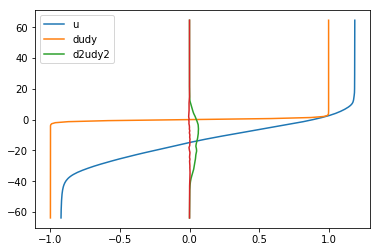

In [84]:
# derivatives with homog neumann bc
def ddy(y,f):
    dy = y[1]-y[0]
    Ny = np.size(y)
    dfdy = np.empty(Ny)
    
    for i in range(1,Ny-1):
        dfdy[i] = (f[i+1]-f[i-1])/(2*dy)
    
    # boundaries
    dfdy[0] = (f[1]-f[0])/dy
    dfdy[Ny-1] = (f[Ny-1]-f[Ny-2])/dy
    return dfdy

def d2dy2(y,f):
    dy = y[1]-y[0]
    Ny = np.size(y)
    d2fdy2 = np.empty(Ny)

    # boundaries
    d2fdy2[0] = 0
    d2fdy2[Ny-1] = 0
    
    for i in range(1,Ny-1):
        d2fdy2[i] = (f[i+1]-2*f[i]+f[i-1])/(dy**2)
    
    
    return d2fdy2
    
u = q_tilde[:,0]
plt.plot(u,yplot)
plt.plot(np.tanh(yplot),yplot)

dudy = ddy(yplot,u)
plt.plot(dudy,yplot)

d2udy2 = d2dy2(yplot,u)
plt.plot(d2udy2,yplot)

plt.legend(['u','dudy','d2udy2'])